# Magic Carpet

In [ ]:
!pip install scikit_posthocs

In [5]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# workspace path (set to your own GDrive path)

%cd /content/drive/MyDrive/Colab_Notebooks/MagicCarpet


/content/drive/MyDrive/Colab_Notebooks/MagicCarpet


In [13]:
import os
import pandas as pd
import numpy as np

import pandas as pd
from scipy import stats
import scikit_posthocs as sp
from scipy.stats import kruskal

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [16]:
def color_significant(val):
    color = 'green' if val <= 0.05 else 'none'
    return f'background-color: {color}'

## 2nd Test


### Collisions

In [10]:
collisions_df = pd.read_csv( os.getcwd() + "/2ndTest/collision/colision.csv")

# Convert collision columns to numeric
collisions_df['joysticknCol'] = pd.to_numeric(collisions_df['joysticknCol'], errors='coerce')
collisions_df['joysticktimeCol'] = pd.to_numeric(collisions_df['joysticktimeCol'], errors='coerce')
collisions_df['circlenCol'] = pd.to_numeric(collisions_df['circlenCol'], errors='coerce')
collisions_df['circletimeCol'] = pd.to_numeric(collisions_df['circletimeCol'], errors='coerce')
collisions_df['wipnCol'] = pd.to_numeric(collisions_df['wipnCol'], errors='coerce')
collisions_df['wiptimeCol'] = pd.to_numeric(collisions_df['wiptimeCol'], errors='coerce')

# Drop any rows with missing values
collisions_df.dropna(inplace=True)


collisions_df.head()

,joysticknCol,joysticktimeCol,circlenCol,circletimeCol,wipnCol,wiptimeCol
0,1,2.054943,1,1.516991,3.0,1.730211
1,2,2.639069,3,2.879440,2.0,4.110977
2,1,2.488720,2,2.434586,2.0,2.858231
3,2,2.792885,3,2.991615,3.0,7.822990
4,1,2.533722,2,2.967728,3.0,1.302101


#### Summary Statistics

In [11]:
summary_stats_colision = collisions_df.describe()
summary_stats_colision


,joysticknCol,joysticktimeCol,circlenCol,circletimeCol,wipnCol,wiptimeCol
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1.529412,2.962399,2.647059,3.409042,2.647059,3.480441
std,0.799816,0.963173,1.221739,1.348518,0.996317,1.947826
min,1.000000,1.673798,1.000000,1.516991,2.000000,1.302101
25%,1.000000,2.582672,2.000000,2.327827,2.000000,1.961250
50%,1.000000,2.792885,2.000000,2.991615,2.000000,2.858231
75%,2.000000,3.104149,3.000000,4.729271,3.000000,4.140907
max,3.000000,6.320923,6.000000,6.124874,6.000000,7.822990


**Number of Collisions:**

- Circle and WIP techniques have a higher mean number of collisions (2.65) compared to Joystick (1.53).
- The range of collisions is broader for Circle (1 to 6) and WIP (2 to 6) than for Joystick (1 to 3).

**Collision Time:**
- The mean collision time is slightly higher for WIP (3.48) compared to Circle (3.41) and Joystick (2.96).
- The standard deviation for collision time is highest for WIP (1.95), indicating greater variability.

In [15]:
# Comparative Analysis using Kruskal-Wallis H test
stat_collisions_number, p_value_collisions_number = kruskal(collisions_df['joysticknCol'],
                                                            collisions_df['circlenCol'],
                                                            collisions_df['wipnCol'])

# Print the result of the statistical test
kruskal_test_collisions_number_result = {'Kruskal-Wallis H statistic': stat_collisions_number, 'p-value': p_value_collisions_number}
print( "Kruskal Test Collision Number", kruskal_test_collisions_number_result, "\n")



Kruskal Test Collision Number {'Kruskal-Wallis H statistic': 13.675721861071521, 'p-value': 0.0010723948750841854} 



In [17]:
groups = {
    'joysticknCol': collisions_df['joysticknCol'],
    'circlenCol': collisions_df['circlenCol'],
    'wipnCol': collisions_df['wipnCol']
}

# Dunn's Test for multiple comparisons
p_values = sp.posthoc_dunn([group for group in groups.values()], p_adjust='bonferroni')
p_values.rename(columns={1: 'joysticknCol', 2: 'circlenCol', 3: 'wipnCol'}, inplace=True)
p_values.index = ['joysticknCol', 'circlenCol', 'wipnCol']

cmap = sns.diverging_palette(133, 0, as_cmap=True)
p_values = p_values.style.applymap(color_significant).format("{:.4f}")
p_values


,joysticknCol,circlenCol,wipnCol
joysticknCol,1.0000,0.0057,0.0030
circlenCol,0.0057,1.0000,1.0000
wipnCol,0.0030,1.0000,1.0000


In [21]:
stat_collisions_time, p_value_collisions_time = kruskal(collisions_df['joysticktimeCol'],
                                                        collisions_df['circletimeCol'],
                                                        collisions_df['wiptimeCol'])

kruskal_test_collisions_time_result = {'Kruskal-Wallis H statistic': stat_collisions_time, 'p-value': p_value_collisions_time}

print("Kruskal Test Collision Time", kruskal_test_collisions_time_result )

Kruskal Test Collision Time {'Kruskal-Wallis H statistic': 0.4221453287197221, 'p-value': 0.8097152273048702}


In [20]:
groups = {
    'joysticktimeCol': collisions_df['joysticktimeCol'],
    'circletimeCol': collisions_df['circletimeCol'],
    'wiptimeCol': collisions_df['wiptimeCol']
}

# Dunn's Test for multiple comparisons
p_values = sp.posthoc_dunn([group for group in groups.values()], p_adjust='bonferroni')
p_values.rename(columns={1: 'joysticktimeCol', 2: 'circletimeCol', 3: 'wiptimeCol'}, inplace=True)
p_values.index = ['joysticktimeCol', 'circletimeCol', 'wiptimeCol']

cmap = sns.diverging_palette(133, 0, as_cmap=True)
p_values = p_values.style.applymap(color_significant).format("{:.4f}")
p_values


,joysticktimeCol,circletimeCol,wiptimeCol
joysticktimeCol,1.0000,1.0000,1.0000
circletimeCol,1.0000,1.0000,1.0000
wiptimeCol,1.0000,1.0000,1.0000


The Kruskal-Wallis H test indicates that there is a statistically significant difference in the number of collisions between the different techniques. However, there is no statistically significant difference in collision times between the techniques.

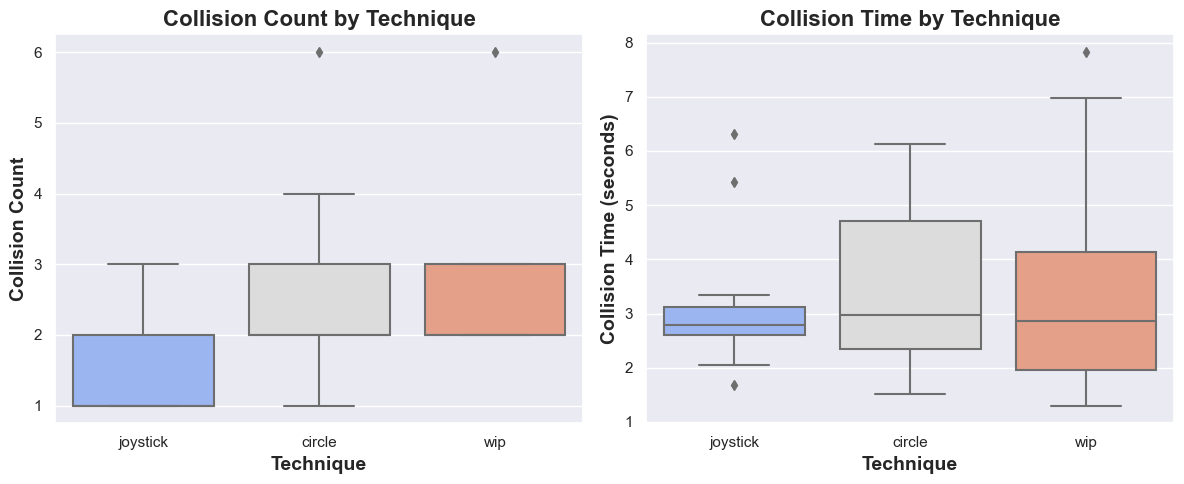

In [ ]:
# Visualization: Box plots for comparing techniques based on collision counts and times

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for collision counts by technique
data_melted_count_new = collisions_df.melt(id_vars=['wiptimeCol'], value_vars=['joysticknCol', 'circlenCol', 'wipnCol'], var_name='Technique', value_name='Collision Count')
data_melted_count_new['Technique'] = data_melted_count_new['Technique'].str.replace('nCol', '')
sns.boxplot(x='Technique', y='Collision Count', data=data_melted_count_new, palette='coolwarm', ax=ax[0])
ax[0].set_title('Collision Count by Technique', fontsize=16, weight='bold')
ax[0].set_xlabel('Technique', fontsize=14, weight='bold')
ax[0].set_ylabel('Collision Count', fontsize=14, weight='bold')

# Boxplot for collision times by technique
data_melted_time_new = collisions_df.melt(id_vars=['wipnCol'], value_vars=['joysticktimeCol', 'circletimeCol', 'wiptimeCol'],var_name='Technique', value_name='Collision Time')
data_melted_time_new['Technique'] = data_melted_time_new['Technique'].str.replace('timeCol', '')
sns.boxplot(x='Technique', y='Collision Time', data=data_melted_time_new, palette='coolwarm', ax=ax[1])
ax[1].set_title('Collision Time by Technique', fontsize=16, weight='bold')
ax[1].set_xlabel('Technique', fontsize=14, weight='bold')
ax[1].set_ylabel('Collision Time (seconds)', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


**Summary**

**Number of Collisions:**

- Joystick has the lowest number of collisions with minimal variability.
- Circle and WalkingInPlace have higher and more variable numbers of collisions.
- The significant difference indicated by the Kruskal-Wallis H test suggests that the technique used affects the number of collisions.

**Collision Time:**

- Joystick has the lowest collision times, followed by Circle and then WalkingInPlace.
- Although the box plots show some differences, the Kruskal-Wallis H test indicates that these differences are not statistically significant.

### Correlation Analysis Between Collision Count and Time


Given that we've already identified significant differences in the number of collisions between techniques but not in collision times, performing a correlation analysis could still provide useful insights into how these metrics are related. Specifically, it could help us understand if there's a relationship between the number of collisions and collision times within each technique or across techniques.

In [ ]:
correlation_matrix_collisions = collisions_df[['joysticknCol', 'joysticktimeCol', 'circlenCol', 'circletimeCol', 'wipnCol', 'wiptimeCol']].corr()

# Display the correlation matrix
correlation_matrix_collisions

,joysticknCol,joysticktimeCol,circlenCol,circletimeCol,wipnCol,wiptimeCol
joysticknCol,1.000000,-0.060425,-0.180594,-0.156153,0.249136,0.017306
joysticktimeCol,-0.060425,1.000000,0.095289,0.413731,-0.029111,-0.157179
circlenCol,-0.180594,0.095289,1.000000,0.506616,0.045305,0.226384
circletimeCol,-0.156153,0.413731,0.506616,1.000000,0.034023,0.366780
wipnCol,0.249136,-0.029111,0.045305,0.034023,1.000000,0.259363
wiptimeCol,0.017306,-0.157179,0.226384,0.366780,0.259363,1.000000


**Summary**

**Joystick:**
- There is a very weak negative correlation between the number of collisions and collision time (-0.06).

**Circle:**
- There is a moderate positive correlation between the number of collisions and collision time (0.51), indicating that more collisions generally lead to higher collision times.

**WIP:**
- There is a weak positive correlation between the number of collisions and collision time (0.26), suggesting a slight tendency for more collisions to result in longer collision times.

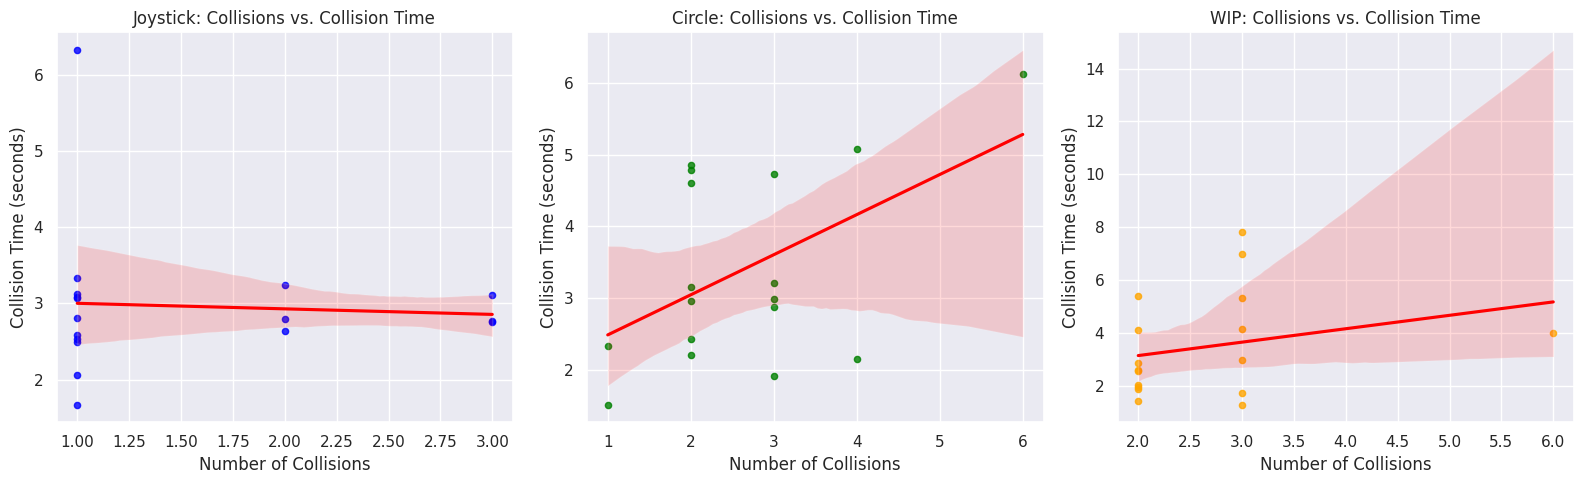

In [ ]:
# Step 4: Visualizations with different colors for scatter circles
plt.figure(figsize=(16, 5))

# Scatter plot for Joystick
plt.subplot(1, 3, 1)
sns.regplot(x='joysticknCol', y='joysticktimeCol', data=collisions_df, scatter_kws={'s':20, 'color':'blue'}, line_kws={'color':'red'})
plt.title('Joystick: Collisions vs. Collision Time')
plt.xlabel('Number of Collisions')
plt.ylabel('Collision Time (seconds)')

# Scatter plot for Circle
plt.subplot(1, 3, 2)
sns.regplot(x='circlenCol', y='circletimeCol', data=collisions_df, scatter_kws={'s':20, 'color':'green'}, line_kws={'color':'red'})
plt.title('Circle: Collisions vs. Collision Time')
plt.xlabel('Number of Collisions')
plt.ylabel('Collision Time (seconds)')

# Scatter plot for WIP
plt.subplot(1, 3, 3)
sns.regplot(x='wipnCol', y='wiptimeCol', data=collisions_df, scatter_kws={'s':20, 'color':'orange'}, line_kws={'color':'red'})
plt.title('WIP: Collisions vs. Collision Time')
plt.xlabel('Number of Collisions')
plt.ylabel('Collision Time (seconds)')

plt.tight_layout()
plt.show()


### Summary

These visualizations confirm the varying relationships between the number of collisions and collision times across different techniques:

- Joystick shows almost no relationship, indicating that collision time does not significantly depend on the number of collisions.
- Circle has a moderate positive relationship, suggesting that reducing the number of collisions could effectively lower the collision time.
- WIP exhibits a weak positive relationship, implying a slight increase in collision time with more collisions.
